In [1]:
# 분석 패키지 
import numpy as np, pandas as pd
import datetime

# 시각화 패키지 
import matplotlib.pylab as plt

import seaborn as sns
import plotly.graph_objs as go
import plotly.tools as tls
from plotly.offline import iplot, init_notebook_mode
import plotly.figure_factory as ff

# 유틸 패키지 
import gc
from tqdm import tqdm_notebook

In [2]:
%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

import plotly.graph_objs as go

In [3]:
# activity.csv : 캐릭터별 활동 이력. 
train_activity = pd.read_csv("./input/train_activity.csv")
test1_activity = pd.read_csv("./input/test1_activity.csv")
test2_activity = pd.read_csv("./input/test2_activity.csv")

In [4]:
# combat.csv : 캐릭터별 전투 이력
train_combat = pd.read_csv("./input/train_combat.csv")
test1_combat = pd.read_csv("./input/test1_combat.csv")
test2_combat = pd.read_csv("./input/test2_combat.csv")

KeyboardInterrupt: 

In [ ]:
# payment.csv : 결제 데이터 
train_payment = pd.read_csv("./input/train_payment.csv")
test1_payment = pd.read_csv("./input/test1_payment.csv")
test2_payment = pd.read_csv("./input/test2_payment.csv")

In [ ]:
# pledge.csv 소속 혈맹 전투 활동 정보 
train_pledge = pd.read_csv("./input/train_pledge.csv")
test1_pledge = pd.read_csv("./input/test1_pledge.csv")
test2_pledge = pd.read_csv("./input/test2_pledge.csv")

In [ ]:
# trade.csv 거래 이력 
train_trade = pd.read_csv("./input/train_trade.csv")
test1_trade = pd.read_csv("./input/test1_trade.csv")
test2_trade = pd.read_csv("./input/test2_trade.csv")

In [ ]:
# label.csv 
train_label = pd.read_csv("./input/train_label.csv")

### 데이터 결합 

- activity : [day, acc_id, char_id, server]
- combat : [day, acc_id, char_id, server]
- payment : [day, acc_id] 
- pledge : [day, acc_id, char_id, server]
- trade : 
    - [day, source_acc_id, source_char_id, target_acc_id, target_char_id] 
    - [day, target_acc_id, target_char_id, source_acc_id, source_char_id] 

In [ ]:
# market은 개인 상점을 통해서 이루어진 거래를 의미. 
# people은 개인과 개인을 통해서 이루어진 거래를 의미. 
train = train_activity[['day','server','acc_id', 'char_id']]
train_trade_market = train_trade[train_trade["type"]==0]
train_trade_people = train_trade[train_trade["type"]==1]

In [ ]:
train_trade_people['item_type'].unique()

In [ ]:
# source_acc_id와 source_char_id를 통해서 groupby를 한 경우는 주는 사람을 입장으로 agg
train_trade_market_item_amount_source = train_trade_market.groupby(['day','server','source_acc_id','source_char_id','item_type'])['item_amount'].agg({'sum'}).reset_index()
train_trade_market_item_amount_source.rename(columns={"sum":"{}".format('market_amount_source')},inplace=True)

train_trade_market_item_price_source = train_trade_market.groupby(['day','server','source_acc_id','source_char_id','item_type'])['item_price'].agg({'sum'}).reset_index()
train_trade_market_item_price_source.rename(columns={"sum":"{}".format('market_price_source')},inplace=True)

train_trade_people_item_amount_source = train_trade_people.groupby(['day','server','source_acc_id','source_char_id','item_type'])['item_amount'].agg({'sum'}).reset_index()
train_trade_people_item_amount_source.rename(columns={"sum":"{}".format('people_amount_source')},inplace=True)

# target_acc_id와 target_char_id 통해서 groupby를 한 경우는 받는 사람을 입장으로 agg
train_trade_market_item_amount_target = train_trade_market.groupby(['day','server','target_acc_id','target_char_id','item_type'])['item_amount'].agg({'sum'}).reset_index()
train_trade_market_item_amount_target.rename(columns={"sum":"{}".format('market_amount_target')},inplace=True)

train_trade_market_item_price_target = train_trade_market.groupby(['day','server','target_acc_id','target_char_id','item_type'])['item_price'].agg({'sum'}).reset_index()
train_trade_market_item_price_target.rename(columns={"sum":"{}".format('market_price_target')},inplace=True)

train_trade_people_item_amount_target = train_trade_people.groupby(['day','server','target_acc_id','target_char_id','item_type'])['item_amount'].agg({'sum'}).reset_index()
train_trade_people_item_amount_target.rename(columns={"sum":"{}".format('people_amount_target')},inplace=True)

In [ ]:
for df in tqdm_notebook([train_trade_market_item_amount_source, train_trade_market_item_price_source, train_trade_people_item_amount_source]):
    for i in ['etc', 'enchant_scroll', 'accessory', 'armor', 'weapon', 'spell']:
        df_i = df[df['item_type'] == i].reset_index(drop=True)
        df_i.rename(columns={"{}".format(df_i.columns[5]):"{}_{}".format(df_i.columns[5],i)},inplace=True)
        df_i.rename(columns={"source_acc_id":"acc_id"},inplace=True)
        df_i.rename(columns={"source_char_id":"char_id"},inplace=True)
        del df_i['item_type']
        
        train = train.merge(df_i,how='left',on=['day','server', 'acc_id', 'char_id'])
        
for df in tqdm_notebook([train_trade_market_item_amount_target, train_trade_market_item_price_target, train_trade_people_item_amount_target]):
    for i in ['etc', 'enchant_scroll', 'accessory', 'armor', 'weapon', 'spell', 'adena']:
        df_i = df[df['item_type'] == i].reset_index(drop=True)
        df_i.rename(columns={"{}".format(df_i.columns[5]):"{}_{}".format(df_i.columns[5],i)},inplace=True)
        df_i.rename(columns={"target_acc_id":"acc_id"},inplace=True)
        df_i.rename(columns={"target_char_id":"char_id"},inplace=True)
        del df_i['item_type']
        
        train = train.merge(df_i,how='left',on=['day','server','acc_id', 'char_id'])

In [ ]:
train = train.fillna(0)
train = train.merge(train_activity,how='left',on=['day', 'acc_id', 'char_id', 'server'])
train = train.merge(train_combat,how='left',on=['day', 'acc_id', 'char_id', 'server'])
train = train.merge(train_pledge,how='left',on=['day', 'acc_id', 'char_id', 'server'])
# train = train.merge(train_payment,how='left',on=['day', 'acc_id'])

In [ ]:
test1 = test1_activity[['day','server','acc_id', 'char_id']]

# market은 개인 상점을 통해서 이루어진 거래를 의미. 
# people은 개인과 개인을 통해서 이루어진 거래를 의미. 
test1_trade_market = test1_trade[test1_trade["type"]==0]
test1_trade_people = test1_trade[test1_trade["type"]==1]

# source_acc_id와 source_char_id를 통해서 groupby를 한 경우는 주는 사람을 입장으로 agg
test1_trade_market_item_amount_source = test1_trade_market.groupby(['day','server','source_acc_id','source_char_id','item_type'])['item_amount'].agg({'sum'}).reset_index()
test1_trade_market_item_amount_source.rename(columns={"sum":"{}".format('market_amount_source')},inplace=True)

test1_trade_market_item_price_source = test1_trade_market.groupby(['day','server','source_acc_id','source_char_id','item_type'])['item_price'].agg({'sum'}).reset_index()
test1_trade_market_item_price_source.rename(columns={"sum":"{}".format('market_price_source')},inplace=True)

test1_trade_people_item_amount_source = test1_trade_people.groupby(['day','server','source_acc_id','source_char_id','item_type'])['item_amount'].agg({'sum'}).reset_index()
test1_trade_people_item_amount_source.rename(columns={"sum":"{}".format('people_amount_source')},inplace=True)

# target_acc_id와 target_char_id 통해서 groupby를 한 경우는 받는 사람을 입장으로 agg
test1_trade_market_item_amount_target = test1_trade_market.groupby(['day','server','target_acc_id','target_char_id','item_type'])['item_amount'].agg({'sum'}).reset_index()
test1_trade_market_item_amount_target.rename(columns={"sum":"{}".format('market_amount_target')},inplace=True)

test1_trade_market_item_price_target = test1_trade_market.groupby(['day','server','target_acc_id','target_char_id','item_type'])['item_price'].agg({'sum'}).reset_index()
test1_trade_market_item_price_target.rename(columns={"sum":"{}".format('market_price_target')},inplace=True)

test1_trade_people_item_amount_target = test1_trade_people.groupby(['day','server','target_acc_id','target_char_id','item_type'])['item_amount'].agg({'sum'}).reset_index()
test1_trade_people_item_amount_target.rename(columns={"sum":"{}".format('people_amount_target')},inplace=True)

for df in tqdm_notebook([test1_trade_market_item_amount_source, test1_trade_market_item_price_source, test1_trade_people_item_amount_source]):
    for i in ['etc', 'enchant_scroll', 'accessory', 'armor', 'weapon', 'spell']:
        df_i = df[df['item_type'] == i].reset_index(drop=True)
        df_i.rename(columns={"{}".format(df_i.columns[5]):"{}_{}".format(df_i.columns[5],i)},inplace=True)
        df_i.rename(columns={"source_acc_id":"acc_id"},inplace=True)
        df_i.rename(columns={"source_char_id":"char_id"},inplace=True)
        del df_i['item_type']
        
        test1 = test1.merge(df_i,how='left',on=['day','server', 'acc_id', 'char_id'])
        
for df in tqdm_notebook([test1_trade_market_item_amount_target, test1_trade_market_item_price_target, test1_trade_people_item_amount_target]):
    for i in ['etc', 'enchant_scroll', 'accessory', 'armor', 'weapon', 'spell','adena']:
        df_i = df[df['item_type'] == i].reset_index(drop=True)
        df_i.rename(columns={"{}".format(df_i.columns[5]):"{}_{}".format(df_i.columns[5],i)},inplace=True)
        df_i.rename(columns={"target_acc_id":"acc_id"},inplace=True)
        df_i.rename(columns={"target_char_id":"char_id"},inplace=True)
        del df_i['item_type']
        
        test1 = test1.merge(df_i,how='left',on=['day','server','acc_id', 'char_id'])
        
test1 = test1.fillna(0) 
test1 = test1.merge(test1_activity,how='left',on=['day', 'acc_id', 'char_id', 'server'])
test1 = test1.merge(test1_combat,how='left',on=['day', 'acc_id', 'char_id', 'server'])
test1 = test1.merge(test1_pledge,how='left',on=['day', 'acc_id', 'char_id', 'server'])

In [ ]:
test2 = test2_activity[['day','server','acc_id', 'char_id']]

# market은 개인 상점을 통해서 이루어진 거래를 의미. 
# people은 개인과 개인을 통해서 이루어진 거래를 의미. 
test2_trade_market = test2_trade[test2_trade["type"]==0]
test2_trade_people = test2_trade[test2_trade["type"]==1]

# source_acc_id와 source_char_id를 통해서 groupby를 한 경우는 주는 사람을 입장으로 agg
test2_trade_market_item_amount_source = test2_trade_market.groupby(['day','server','source_acc_id','source_char_id','item_type'])['item_amount'].agg({'sum'}).reset_index()
test2_trade_market_item_amount_source.rename(columns={"sum":"{}".format('market_amount_source')},inplace=True)

test2_trade_market_item_price_source = test2_trade_market.groupby(['day','server','source_acc_id','source_char_id','item_type'])['item_price'].agg({'sum'}).reset_index()
test2_trade_market_item_price_source.rename(columns={"sum":"{}".format('market_price_source')},inplace=True)

test2_trade_people_item_amount_source = test2_trade_people.groupby(['day','server','source_acc_id','source_char_id','item_type'])['item_amount'].agg({'sum'}).reset_index()
test2_trade_people_item_amount_source.rename(columns={"sum":"{}".format('people_amount_source')},inplace=True)

# target_acc_id와 target_char_id 통해서 groupby를 한 경우는 받는 사람을 입장으로 agg
test2_trade_market_item_amount_target = test2_trade_market.groupby(['day','server','target_acc_id','target_char_id','item_type'])['item_amount'].agg({'sum'}).reset_index()
test2_trade_market_item_amount_target.rename(columns={"sum":"{}".format('market_amount_target')},inplace=True)

test2_trade_market_item_price_target = test2_trade_market.groupby(['day','server','target_acc_id','target_char_id','item_type'])['item_price'].agg({'sum'}).reset_index()
test2_trade_market_item_price_target.rename(columns={"sum":"{}".format('market_price_target')},inplace=True)

test2_trade_people_item_amount_target = test2_trade_people.groupby(['day','server','target_acc_id','target_char_id','item_type'])['item_amount'].agg({'sum'}).reset_index()
test2_trade_people_item_amount_target.rename(columns={"sum":"{}".format('people_amount_target')},inplace=True)

for df in tqdm_notebook([test2_trade_market_item_amount_source, test2_trade_market_item_price_source, test2_trade_people_item_amount_source]):
    for i in ['etc', 'enchant_scroll', 'accessory', 'armor', 'weapon', 'spell']:
        df_i = df[df['item_type'] == i].reset_index(drop=True)
        df_i.rename(columns={"{}".format(df_i.columns[5]):"{}_{}".format(df_i.columns[5],i)},inplace=True)
        df_i.rename(columns={"source_acc_id":"acc_id"},inplace=True)
        df_i.rename(columns={"source_char_id":"char_id"},inplace=True)
        del df_i['item_type']
        
        test2 = test2.merge(df_i,how='left',on=['day','server', 'acc_id', 'char_id'])
        
for df in tqdm_notebook([test2_trade_market_item_amount_target, test2_trade_market_item_price_target, test2_trade_people_item_amount_target]):
    for i in ['etc', 'enchant_scroll', 'accessory', 'armor', 'weapon', 'spell','adena']:
        df_i = df[df['item_type'] == i].reset_index(drop=True)
        df_i.rename(columns={"{}".format(df_i.columns[5]):"{}_{}".format(df_i.columns[5],i)},inplace=True)
        df_i.rename(columns={"target_acc_id":"acc_id"},inplace=True)
        df_i.rename(columns={"target_char_id":"char_id"},inplace=True)
        del df_i['item_type']
        
        test2 = test2.merge(df_i,how='left',on=['day','server','acc_id', 'char_id'])
        
test2 = test2.fillna(0) 
test2 = test2.merge(test2_activity,how='left',on=['day', 'acc_id', 'char_id', 'server'])
test2 = test2.merge(test2_combat,how='left',on=['day', 'acc_id', 'char_id', 'server'])
test2 = test2.merge(test2_pledge,how='left',on=['day', 'acc_id', 'char_id', 'server'])

### 전처리 

- 익명화된 값을 풀기

In [ ]:
# 익명화된 값을 푸는 함수 
def deanonymization(dataframe):
    # columns_list에 속한 변수들을 0을 제외한 최솟값으로 나누어서 익명화를 푸는 작업입니다. 
    columns_list = [i for i in dataframe.columns.tolist() if i not in ['day','acc_id','char_id','game_money_change','server','class', 'level', 'pledge_id']]
    for i in columns_list:
        try:
            dataframe[i] = (dataframe[i] / dataframe[dataframe[i] != 0][i].min())
        except:
            print("{} 변수는 deanonymization에 해당하지 않습니다.".format(i))
            
    min_value = dataframe[dataframe['game_money_change'] > 0]['game_money_change'].min()
    dataframe['game_money_change'] = (dataframe['game_money_change'] / min_value)
    
    return dataframe

In [ ]:
train = deanonymization(train)
test1 = deanonymization(test1)
test2 = deanonymization(test2)

- 변수명 수정 : rich_monster to boss_monster

In [ ]:
train.rename(columns={"rich_monster":"boss_monster"},inplace=True)
test1.rename(columns={"rich_monster":"boss_monster"},inplace=True)
test2.rename(columns={"rich_monster":"boss_monster"},inplace=True)

- 서버의 특성 분류 : PVP, NON-PVP, GENERAL

In [ ]:
# 서버의 종류를 분류해주는 함수 
def classification_server(dataframe):
    # 서버변수가 있는 dataframe이 들어오면, server가 특화, 일반, NON-PVP 
    # 셋 중 무엇인지 분류해주는 함수입니다. 
    PVP = ['bj', 'bk', 'bl']
    NON_PVP = ['be', 'bf', 'bg', 'bh', 'bi', 'bq', 'bs']
    GENERAL = ['aa','ab','ac','ad','ae','af','ag','ah','ai', 'aj', 'ak', 'al', 'am', 'an', 'ao', 'ap', 'aq', 'ar', 'as', 'at', 'au', 'av', 'aw', 'ax', 'ay', 'az', 'bb', 'bc', 'bd', 'bm', 'bn', 'bo', 'bp', 'br']
    
    # 만약 dataframe에 서버변수가 없다면 자기 자신을 출력해주도록 합니다. 
    if 'server' not in dataframe.columns.tolist():
        return dataframe 
    else :
        dataframe['server_class'] = dataframe['server'].apply(lambda x: 'PVP' if x in PVP else ('NON-PVP' if x in NON_PVP else 'GENERAL'))
        return dataframe

In [ ]:
train = classification_server(train)
test1 = classification_server(test1)
test2 = classification_server(test2)

- 레벨에 따른 실력 분류 
    - 고수 : 80레벨 이상
    - 중수 : 40 ~ 79레벨 
    - 하수 : 39레벨 이하

In [ ]:
# 캐릭터의 레벨에 따른 상태를 알려주는 함수  
def classification_level(dataframe):
    # 레벨변수가 있는 dataframe이 들어오면, 초보, 중수, 고수
    # 셋 중 무엇인지 분류해주는 함수입니다. 
    # 만약 dataframe에 레벨변수가 없다면 자기 자신을 출력해주도록 합니다. 
    if 'level' not in dataframe.columns.tolist():
        return dataframe
    elif 'acc_id' not in dataframe.columns.tolist():
        return dataframe
    else :
        dataframe_max_level = dataframe.groupby(['acc_id'])['level'].agg({'max'}).reset_index()
        dataframe_max_level['level_class'] = dataframe_max_level['max'].apply(lambda x: 'Hasu' if x <= 7 else ('Joongsu' if x <= 16 else 'Gosu'))
        dataframe_max_level = dataframe_max_level[['acc_id','level_class']]
        dataframe = dataframe.merge(dataframe_max_level,how='left',on=['acc_id'])
        return dataframe

In [ ]:
train = classification_level(train)
test1 = classification_level(test1)
test2 = classification_level(test2)

In [ ]:
# fishing, private_shop의 잘못된 값을 수정. 
def preprocessing(dataframe):
    # 1. 30레벨(level = 5) 이전에 낚시하는 사람의 낚시 시간은 0. 
    dataframe.loc[dataframe['level'] <= 5, 'fishing'] = 0
    # 2. 낚시를 함에도 solo_exp가 0인 사람은 낚시 시간 0. 
    dataframe.loc[dataframe['solo_exp'] == 0, 'fishing'] = 0
    # 3. playtime시간보다 낚시, private_shop시간이 긴 사람은 max값이 playtime이 되도록 수정. 
    dataframe.loc[60*dataframe['playtime'] < dataframe['fishing'], 'fishing'] = 60 * dataframe.loc[60*dataframe['playtime'] < dataframe['fishing'], 'playtime'].values
    dataframe.loc[60*dataframe['playtime'] < dataframe['private_shop'], 'private_shop'] = 60 * dataframe.loc[60*dataframe['playtime'] < dataframe['private_shop'], 'playtime'].values
    return dataframe

In [ ]:
train = preprocessing(train)
test1 = preprocessing(test1)
test2 = preprocessing(test2)

- 본캐 : Level이 max인 acc_id내에서 char_id
- 부캐 : 본캐가 아닌 char_id 

참고로 acc_id 8과 같이 max_level의 아이디가 여러개인 경우는 가장 접속시간이 긴 캐릭터를 선택했음. 

In [ ]:
# 본캐와 부캐를 구분하는 함수 
def original_char_id(dataframe):
    train_max_level = pd.DataFrame(dataframe.groupby(['acc_id','char_id'])['level'].max()).reset_index()
    train_sum_playtime = pd.DataFrame(dataframe.groupby(['acc_id','char_id'])['playtime'].sum()).reset_index()
    train_df = pd.merge(train_max_level,train_sum_playtime,how='left',on=['acc_id','char_id'])
    train_df = train_df.sort_values(by=['level','playtime'],ascending=[False,False])
    train_df['is_original_char'] = train_df.groupby(['acc_id']).cumcount()
    train_df['is_original_char'] = train_df['is_original_char'].apply(lambda x: 1 if x == 0 else 0)
    train_df = train_df[['acc_id','char_id','is_original_char']].reset_index(drop=True)
    dataframe = dataframe.merge(train_df,how='left',on=['acc_id','char_id'])
    return dataframe

In [ ]:
train = original_char_id(train)
test1 = original_char_id(test1)
test2 = original_char_id(test2)

### 피처 엔지니어링

In [ ]:
# day를 7일씩 쪼개서 몇주차의 데이터인지를 알려주는 부분입니다. 
train['week'] = (train['day']-1) // 7
test1['week'] = (test1['day']-1) // 7
test2['week'] = (test2['day']-1) // 7

In [ ]:
train.head()

In [ ]:
orginal_train = train.copy()
orginal_test1 = test1.copy()
orginal_test2 = test2.copy()

orginal_train_week1 = orginal_train[orginal_train['week'] == 0]
orginal_train_week2 = orginal_train[orginal_train['week'] == 1]
orginal_train_week3 = orginal_train[orginal_train['week'] == 2]
orginal_train_week4 = orginal_train[orginal_train['week'] == 3]

orginal_test1_week1 = orginal_test1[orginal_test1['week'] == 0]
orginal_test1_week2 = orginal_test1[orginal_test1['week'] == 1]
orginal_test1_week3 = orginal_test1[orginal_test1['week'] == 2]
orginal_test1_week4 = orginal_test1[orginal_test1['week'] == 3]

orginal_test2_week1 = orginal_test2[orginal_test2['week'] == 0]
orginal_test2_week2 = orginal_test2[orginal_test2['week'] == 1]
orginal_test2_week3 = orginal_test2[orginal_test2['week'] == 2]
orginal_test2_week4 = orginal_test2[orginal_test2['week'] == 3]

In [177]:
def create_new_columns(name,aggs):
    return [name + '_' + k + '_' + agg for k in aggs.keys() for agg in aggs[k]]

aggs = {}

# 
aggs['server'] = ['nunique']
aggs['playtime'] = ['sum','max','min','mean','var','count']
aggs['npc_kill'] = ['sum','max','min','mean','var']
aggs['solo_exp'] = ['sum','max','min','mean','var']
aggs['party_exp'] = ['sum','max','min','mean','var']
aggs['quest_exp'] = ['sum','max','min','mean','var']
aggs['boss_monster'] = ['sum', 'mean','var']
aggs['death'] = ['sum','max','var']
aggs['revive'] = ['sum','max','var']
aggs['exp_recovery'] = ['sum', 'max']
aggs['fishing'] = ['sum','mean','var']
aggs['private_shop'] = ['sum', 'mean', 'var']
aggs['game_money_change'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['enchant_count'] = ['sum', 'mean', 'var', 'min', 'max']

# 전투 정보 
aggs['class'] = ['median']
aggs['level'] = ['median']
aggs['pledge_cnt'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['random_attacker_cnt_x'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['random_defender_cnt_x'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['temp_cnt_x'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['same_pledge_cnt_x'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['etc_cnt_x'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['num_opponent'] = ['sum', 'mean', 'var', 'min', 'max']

# 혈맹의 정보 
aggs['pledge_id'] = ['nunique']
aggs['play_char_cnt'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['combat_char_cnt'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['pledge_combat_cnt'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['random_attacker_cnt_y'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['random_defender_cnt_y'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['same_pledge_cnt_y'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['temp_cnt_y'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['etc_cnt_y'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['combat_play_time'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['non_combat_play_time'] = ['sum', 'mean', 'var', 'min', 'max']

# 거래 정보 
# aggs['amount_spent'] = ['mean','sum','min','max','var']
aggs['market_amount_source_etc'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['market_amount_source_enchant_scroll'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['market_amount_source_accessory'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['market_amount_source_armor'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['market_amount_source_weapon'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['market_amount_source_spell'] = ['sum', 'mean', 'var', 'min', 'max']

aggs['market_price_source_etc'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['market_price_source_enchant_scroll'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['market_price_source_accessory'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['market_price_source_armor'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['market_price_source_weapon'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['market_price_source_spell'] = ['sum', 'mean', 'var', 'min', 'max']

aggs['people_amount_source_etc'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['people_amount_source_enchant_scroll'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['people_amount_source_accessory'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['people_amount_source_armor'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['people_amount_source_weapon'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['people_amount_source_spell'] = ['sum', 'mean', 'var', 'min', 'max']

aggs['market_amount_target_etc'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['market_amount_target_enchant_scroll'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['market_amount_target_accessory'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['market_amount_target_armor'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['market_amount_target_weapon'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['market_amount_target_spell'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['market_amount_target_adena'] = ['sum', 'mean', 'var', 'min', 'max']

aggs['market_price_target_etc'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['market_price_target_enchant_scroll'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['market_price_target_accessory'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['market_price_target_armor'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['market_price_target_weapon'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['market_price_target_spell'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['market_price_target_adena'] = ['sum', 'mean', 'var', 'min', 'max']

aggs['people_amount_target_etc'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['people_amount_target_enchant_scroll'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['people_amount_target_accessory'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['people_amount_target_armor'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['people_amount_target_weapon'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['people_amount_target_spell'] = ['sum', 'mean', 'var', 'min', 'max']
aggs['people_amount_target_adena'] = ['sum', 'mean', 'var', 'min', 'max']

In [178]:
new_columns = create_new_columns('week1',aggs)
orginal_df_week1_group_df = orginal_train_week1.groupby(['acc_id']).agg(aggs)
orginal_df_week1_group_df.columns = new_columns 
orginal_df_week1_group_df.reset_index(drop=False,inplace=True)

new_columns = create_new_columns('week2',aggs)
orginal_df_week2_group_df = orginal_train_week2.groupby(['acc_id']).agg(aggs)
orginal_df_week2_group_df.columns = new_columns
orginal_df_week2_group_df.reset_index(drop=False,inplace=True)

new_columns = create_new_columns('week3',aggs)
orginal_df_week3_group_df = orginal_train_week3.groupby(['acc_id']).agg(aggs)
orginal_df_week3_group_df.columns = new_columns 
orginal_df_week3_group_df.reset_index(drop=False,inplace=True)

new_columns = create_new_columns('week4',aggs)
orginal_df_week4_group_df = orginal_train_week4.groupby(['acc_id']).agg(aggs)
orginal_df_week4_group_df.columns = new_columns 
orginal_df_week4_group_df.reset_index(drop=False,inplace=True)

In [179]:
orginal_train_week_group_df = pd.merge(orginal_df_week1_group_df,orginal_df_week2_group_df,how='outer',on='acc_id')
orginal_train_week_group_df = pd.merge(orginal_train_week_group_df,orginal_df_week3_group_df,how='outer',on='acc_id')
orginal_train_week_group_df = pd.merge(orginal_train_week_group_df,orginal_df_week4_group_df,how='outer',on='acc_id')

In [180]:
new_columns = create_new_columns('week1',aggs)
orginal_df_week1_group_df = orginal_test1_week1.groupby(['acc_id']).agg(aggs)
orginal_df_week1_group_df.columns = new_columns 
orginal_df_week1_group_df.reset_index(drop=False,inplace=True)

new_columns = create_new_columns('week2',aggs)
orginal_df_week2_group_df = orginal_test1_week2.groupby(['acc_id']).agg(aggs)
orginal_df_week2_group_df.columns = new_columns 
orginal_df_week2_group_df.reset_index(drop=False,inplace=True)

new_columns = create_new_columns('week3',aggs)
orginal_df_week3_group_df = orginal_test1_week3.groupby(['acc_id']).agg(aggs)
orginal_df_week3_group_df.columns = new_columns 
orginal_df_week3_group_df.reset_index(drop=False,inplace=True)

new_columns = create_new_columns('week4',aggs)
orginal_df_week4_group_df = orginal_test1_week4.groupby(['acc_id']).agg(aggs)
orginal_df_week4_group_df.columns = new_columns 
orginal_df_week4_group_df.reset_index(drop=False,inplace=True)

In [181]:
orginal_test1_week_group_df = pd.merge(orginal_df_week1_group_df,orginal_df_week2_group_df,how='outer',on='acc_id')
orginal_test1_week_group_df = pd.merge(orginal_test1_week_group_df,orginal_df_week3_group_df,how='outer',on='acc_id')
orginal_test1_week_group_df = pd.merge(orginal_test1_week_group_df,orginal_df_week4_group_df,how='outer',on='acc_id')

In [182]:
new_columns = create_new_columns('week1',aggs)
orginal_df_week1_group_df = orginal_test2_week1.groupby(['acc_id']).agg(aggs)
orginal_df_week1_group_df.columns = new_columns 
orginal_df_week1_group_df.reset_index(drop=False,inplace=True)

new_columns = create_new_columns('week2',aggs)
orginal_df_week2_group_df = orginal_test2_week2.groupby(['acc_id']).agg(aggs)
orginal_df_week2_group_df.columns = new_columns 
orginal_df_week2_group_df.reset_index(drop=False,inplace=True)

new_columns = create_new_columns('week3',aggs)
orginal_df_week3_group_df = orginal_test2_week3.groupby(['acc_id']).agg(aggs)
orginal_df_week3_group_df.columns = new_columns 
orginal_df_week3_group_df.reset_index(drop=False,inplace=True)

new_columns = create_new_columns('week4',aggs)
orginal_df_week4_group_df = orginal_test2_week4.groupby(['acc_id']).agg(aggs)
orginal_df_week4_group_df.columns = new_columns 
orginal_df_week4_group_df.reset_index(drop=False,inplace=True)

In [183]:
orginal_test2_week_group_df = pd.merge(orginal_df_week1_group_df,orginal_df_week2_group_df,how='outer',on='acc_id')
orginal_test2_week_group_df = pd.merge(orginal_test2_week_group_df,orginal_df_week3_group_df,how='outer',on='acc_id')
orginal_test2_week_group_df = pd.merge(orginal_test2_week_group_df,orginal_df_week4_group_df,how='outer',on='acc_id')

In [184]:
orginal_train_week_group_df = orginal_train_week_group_df.merge(train[['acc_id','level_class']].drop_duplicates('acc_id'),how='left',on='acc_id')
orginal_test1_week_group_df = orginal_test1_week_group_df.merge(test1[['acc_id','level_class']].drop_duplicates('acc_id'),how='left',on='acc_id')
orginal_test2_week_group_df = orginal_test2_week_group_df.merge(test2[['acc_id','level_class']].drop_duplicates('acc_id'),how='left',on='acc_id')

In [186]:
# weight = orginal_train_week_group_df['level_class'].apply(lambda x : 1 if x != 'Hasu' else 0.2).values

In [188]:
from sklearn.preprocessing import LabelEncoder

for col in tqdm_notebook(orginal_train_week_group_df.columns):
    if orginal_train_week_group_df[col].dtype == 'object':
        le = LabelEncoder()
        le.fit(list(orginal_train_week_group_df[col].astype(str).values) + list(orginal_test1_week_group_df[col].astype(str).values) + list(orginal_test2_week_group_df[col].astype(str).values))
        orginal_train_week_group_df[col] = le.transform(list(orginal_train_week_group_df[col].astype(str).values))
        orginal_test1_week_group_df[col] = le.transform(list(orginal_test1_week_group_df[col].astype(str).values))   
        orginal_test2_week_group_df[col] = le.transform(list(orginal_test2_week_group_df[col].astype(str).values))  

In [189]:
print(orginal_train_week_group_df.shape, orginal_test1_week_group_df.shape, orginal_test2_week_group_df.shape)

(40000, 1370) (20000, 1370) (20000, 1370)


In [190]:
del orginal_train_week1;del orginal_train_week2;del orginal_train_week3;del orginal_train_week4;
del orginal_test1_week1;del orginal_test1_week2;del orginal_test1_week3;del orginal_test1_week4;
del orginal_test2_week1;del orginal_test2_week2;del orginal_test2_week3;del orginal_test2_week4;
del orginal_df_week1_group_df; del orginal_df_week2_group_df; del orginal_df_week3_group_df; del orginal_df_week4_group_df

In [191]:
gc.collect()

112

### Adversarial Validation 

In [192]:
features = [c for c in orginal_train_week_group_df.columns if c not in ['acc_id','char_id','server','survival_time','amount_spent','weight']]

In [193]:
# 문제점
# 파라미터에 따라서 아래와 결과가 달라짐. 
params = {'num_leaves': 491,
          'min_child_weight': 0.03454472573214212,
          'feature_fraction': 0.3797454081646243,
          'bagging_fraction': 0.4181193142567742,
          'min_data_in_leaf': 106,
          'objective': 'binary',
          'max_depth': -1,
          'learning_rate': 0.006883242363721497,
          "boosting_type": "gbdt",
          "bagging_seed": 11,
          "metric": 'auc',
          "verbosity": -1,
          'reg_alpha': 0.3899927210061127,
          'reg_lambda': 0.6485237330340494,
          'random_state': 47
         }

In [113]:
train_adversarial = orginal_train_week_group_df.copy()
test_adversarial = orginal_test1_week_group_df.copy()

In [114]:
from sklearn import model_selection, preprocessing, metrics

train_adversarial['target'] = 0
test_adversarial['target'] = 1

train_test = pd.concat([train_adversarial, test_adversarial], axis =0)
target = train_test['target'].values

train_adversarial, test_adversarial = model_selection.train_test_split(train_test, test_size=0.33, random_state=42, shuffle=True)
train_y = train_adversarial['target'].values
test_y = test_adversarial['target'].values
del train_adversarial['target'], test_adversarial['target']
gc.collect()

train_adversarial = lgb.Dataset(train_adversarial[features], label=train_y)
test_adversarial = lgb.Dataset(test_adversarial[features], label=test_y)

In [119]:
num_round = 50
clf = lgb.train(params, train_adversarial, num_round, valid_sets = [train_adversarial, test_adversarial], verbose_eval=50, early_stopping_rounds = 50)

Training until validation scores don't improve for 50 rounds.
[50]	training's auc: 0.98497	valid_1's auc: 0.977204
Did not meet early stopping. Best iteration is:
[50]	training's auc: 0.98497	valid_1's auc: 0.977204


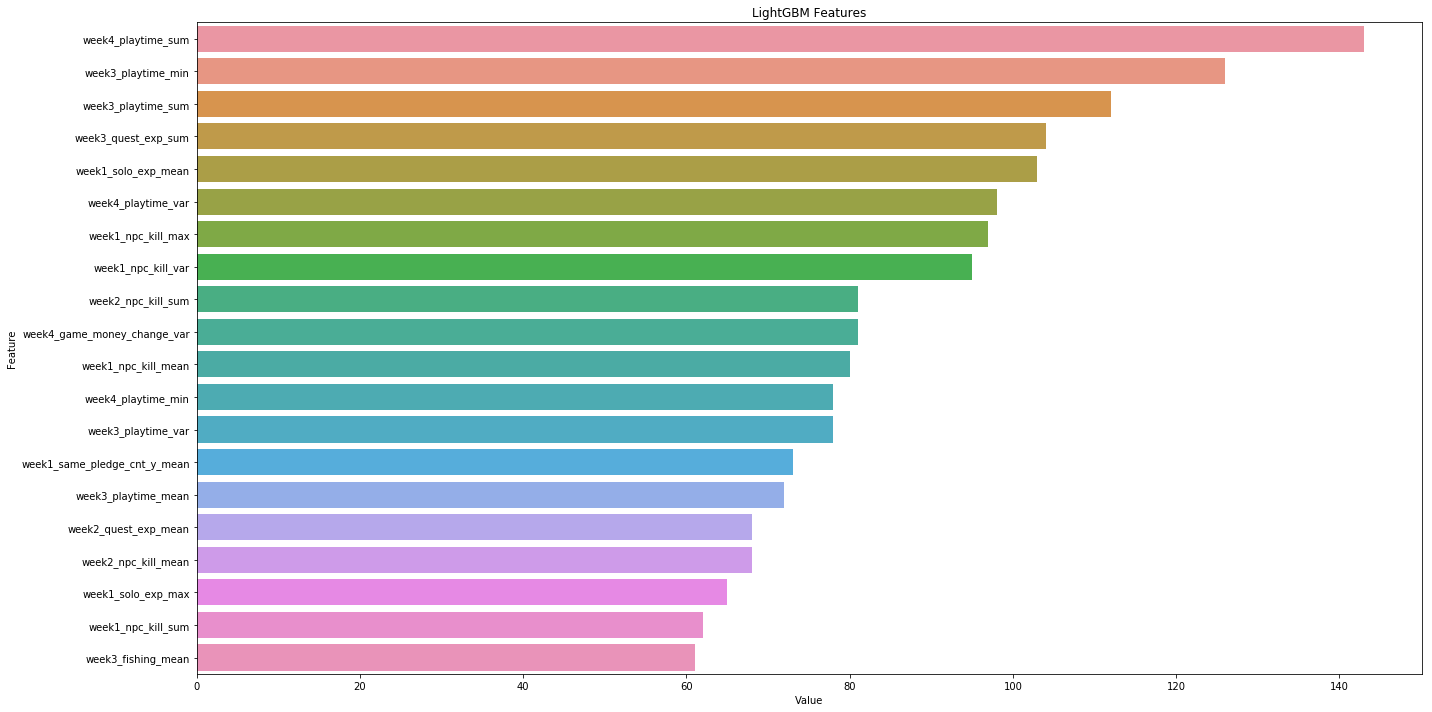

<Figure size 432x288 with 0 Axes>

In [120]:
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importance(),features)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).head(20))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

In [124]:
# drop_features = feature_imp[feature_imp['Value'] > 20]['Feature'].values

### 모델링

변수로 서버추가해줘야 하고 레벨에 따라서 weight주는거 해결해야함. 

In [194]:
from sklearn.model_selection import KFold, StratifiedKFold, TimeSeriesSplit
from sklearn.metrics import roc_auc_score
import lightgbm as lgb

In [195]:
params = {'num_leaves': 7,
          'min_child_weight': 0.03454472573214212,
          'feature_fraction': 0.3797454081646243,
          'bagging_fraction': 0.4181193142567742,
          'min_data_in_leaf': 106,
          'objective': 'regression',
          'max_depth': 3,
          'learning_rate': 0.15,
          "boosting_type": "gbdt",
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": -1,
          "lambda_l1": 0.1, 
          'reg_alpha': 0.3899927210061127,
          'reg_lambda': 0.6485237330340494,
          'random_state': 47
         }

In [196]:
orginal_train_week_group_df = orginal_train_week_group_df.merge(train_label,how='left',on='acc_id')

### survival_time

In [197]:
features = [c for c in orginal_train_week_group_df.columns if c not in ['acc_id','survival_time','amount_spent','weight']]

In [198]:
y = orginal_train_week_group_df['survival_time']
X = orginal_train_week_group_df[features].reset_index(drop=True)

test1 = orginal_test1_week_group_df[features].reset_index(drop=True)
test2 = orginal_test2_week_group_df[features].reset_index(drop=True)

In [201]:
from time import time
import datetime 
from sklearn.metrics import mean_absolute_error 

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=8343)
preds1 = np.zeros(len(test1))
preds2 = np.zeros(len(test2))
oofs = np.zeros(len(X))

mae = list()
feature_importances = pd.DataFrame()
feature_importances['feature'] = X.columns

training_start_time = time()
for fold, (trn_idx, test_idx) in enumerate(folds.split(X, X['level_class'].values)):
    start_time = time()
    print('Training on fold {}'.format(fold + 1))
    
    # lgb.Dataset(,weight='level_class')
    trn_data = lgb.Dataset(X.iloc[trn_idx], label=y.iloc[trn_idx], weight = weight[trn_idx])
    val_data = lgb.Dataset(X.iloc[test_idx], label=y.iloc[test_idx] , weight = weight[test_idx])
    clf = lgb.train(params, trn_data, 1500, valid_sets = [trn_data, val_data], verbose_eval=100, early_stopping_rounds=50)
    
    feature_importances['fold_{}'.format(fold + 1)] = clf.feature_importance()
    mae.append(clf.best_score['valid_1']['l1'])
    preds1 += clf.predict(test1) / 5 ; preds2 += clf.predict(test2) / 5
    oofs[test_idx] = clf.predict(X.iloc[test_idx])
    
    print('Fold {} finished in {}'.format(fold + 1, str(datetime.timedelta(seconds=time() - start_time))))
print('-' * 30)
print('Training has finished.')
print('Total training time is {}'.format(str(datetime.timedelta(seconds=time() - training_start_time))))
print('Mean MAE:', np.mean(mae))
print('MAE:', mean_absolute_error(oofs,y))
print('-' * 30)

Training on fold 1
Training until validation scores don't improve for 50 rounds.
[100]	training's l1: 14.5919	valid_1's l1: 15.0079
[200]	training's l1: 13.8765	valid_1's l1: 14.6154
[300]	training's l1: 13.4535	valid_1's l1: 14.4582
[400]	training's l1: 13.093	valid_1's l1: 14.37
[500]	training's l1: 12.7388	valid_1's l1: 14.2714
[600]	training's l1: 12.4192	valid_1's l1: 14.1952
[700]	training's l1: 12.1107	valid_1's l1: 14.1313
[800]	training's l1: 11.8587	valid_1's l1: 14.0963
[900]	training's l1: 11.6133	valid_1's l1: 14.0738
[1000]	training's l1: 11.3632	valid_1's l1: 14.0253
[1100]	training's l1: 11.1099	valid_1's l1: 13.9768
[1200]	training's l1: 10.9147	valid_1's l1: 13.9661
Early stopping, best iteration is:
[1169]	training's l1: 10.9679	valid_1's l1: 13.9609
Fold 1 finished in 0:00:14.066548
Training on fold 2
Training until validation scores don't improve for 50 rounds.
[100]	training's l1: 14.5031	valid_1's l1: 15.2442
[200]	training's l1: 13.8293	valid_1's l1: 14.8896
[30

In [202]:
test1_predict = pd.DataFrame()
test1_predict['acc_id'] = orginal_test1_week_group_df['acc_id']
test1_predict['survival_time'] = preds1

test2_predict = pd.DataFrame()
test2_predict['acc_id'] = orginal_test2_week_group_df['acc_id']
test2_predict['survival_time'] = preds2

In [203]:
oofs_predict = pd.DataFrame()
oofs_predict['acc_id'] = orginal_train_week_group_df['acc_id']
oofs_predict['survival_time'] = oofs

### amount_spent

In [204]:
from sklearn.metrics import mean_squared_error

In [205]:
y = orginal_train_week_group_df['amount_spent']
X = orginal_train_week_group_df[features].reset_index(drop=True)

test1 = orginal_test1_week_group_df[features].reset_index(drop=True)
test2 = orginal_test2_week_group_df[features].reset_index(drop=True)

In [206]:
from time import time
import datetime 
from sklearn.metrics import mean_absolute_error 

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=8343)
preds1 = np.zeros(len(test1))
preds2 = np.zeros(len(test2))
oofs = np.zeros(len(X))

mae = list()
feature_importances = pd.DataFrame()
feature_importances['feature'] = X.columns

training_start_time = time()
for fold, (trn_idx, test_idx) in enumerate(folds.split(X, X['level_class'].values)):
    start_time = time()
    print('Training on fold {}'.format(fold + 1))
    
    # lgb.Dataset(,weight='level_class')
    trn_data = lgb.Dataset(X.iloc[trn_idx], label=y.iloc[trn_idx])
    val_data = lgb.Dataset(X.iloc[test_idx], label=y.iloc[test_idx])
    clf = lgb.train(params, trn_data, 2000, valid_sets = [trn_data, val_data], verbose_eval=100, early_stopping_rounds=100)
    
    feature_importances['fold_{}'.format(fold + 1)] = clf.feature_importance()
    mae.append(clf.best_score['valid_1']['l1'])
    preds1 += clf.predict(test1) / 5 ; preds2 += clf.predict(test2) / 5
    oofs[test_idx] = clf.predict(X.iloc[test_idx])
    
    print('Fold {} finished in {}'.format(fold + 1, str(datetime.timedelta(seconds=time() - start_time))))
print('-' * 30)
print('Training has finished.')
print('Total training time is {}'.format(str(datetime.timedelta(seconds=time() - training_start_time))))
print('Mean MAE:', np.mean(mae))
print('MAE:', mean_absolute_error(oofs,y))
print('-' * 30)

Training on fold 1
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.141042	valid_1's l1: 0.13296
Early stopping, best iteration is:
[45]	training's l1: 0.1378	valid_1's l1: 0.128747
Fold 1 finished in 0:00:05.494503
Training on fold 2
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.137921	valid_1's l1: 0.142171
Early stopping, best iteration is:
[30]	training's l1: 0.135796	valid_1's l1: 0.138288
Fold 2 finished in 0:00:05.330525
Training on fold 3
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.137858	valid_1's l1: 0.138838
Early stopping, best iteration is:
[43]	training's l1: 0.135173	valid_1's l1: 0.134893
Fold 3 finished in 0:00:05.321868
Training on fold 4
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.130629	valid_1's l1: 0.145184
Early stopping, best iteration is:
[33]	training's l1: 0.130657	valid_1's l1: 0.140991
Fold 4 finish

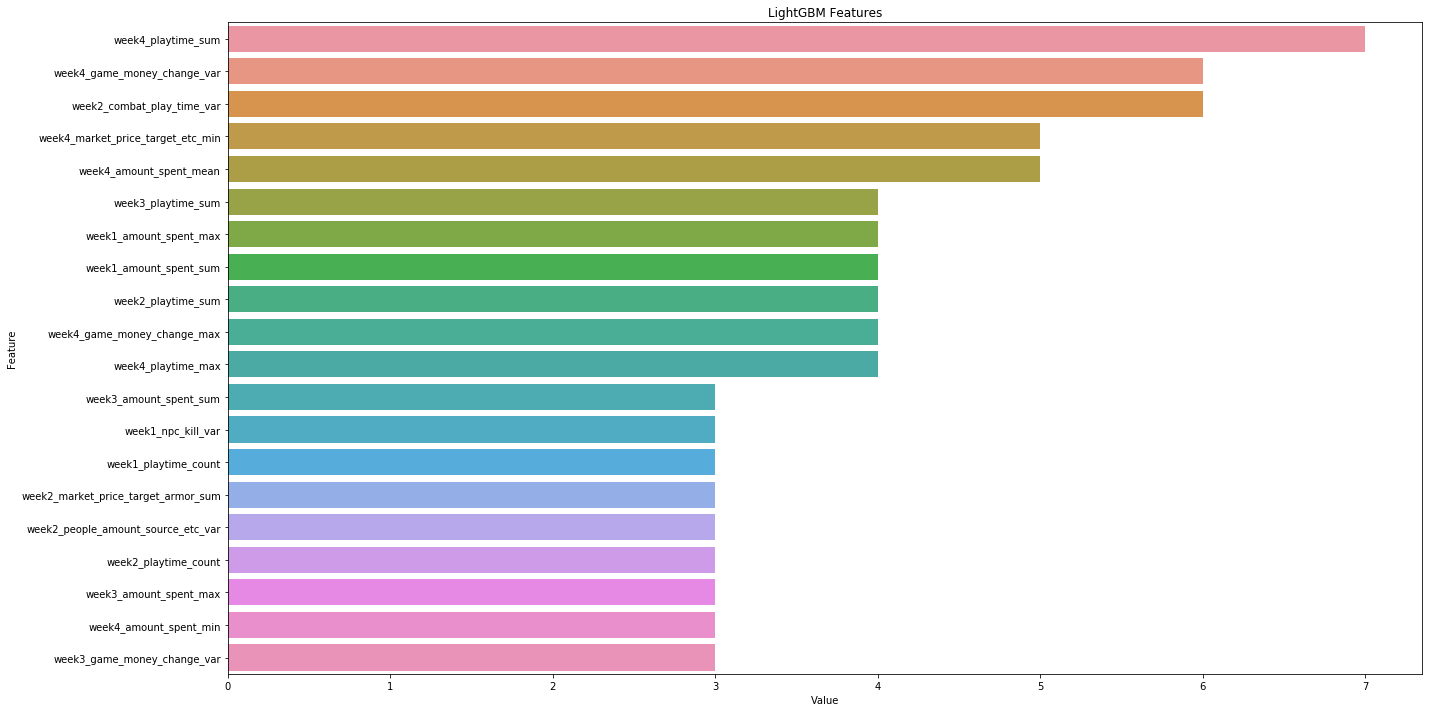

<Figure size 432x288 with 0 Axes>

In [207]:
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importance(),features)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).head(20))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

In [208]:
test1_predict['amount_spent'] = preds1
test2_predict['amount_spent'] = preds2

In [209]:
oofs_predict['amount_spent'] = oofs

In [210]:
oofs_predict['survival_time'] = oofs_predict['survival_time'].apply(lambda x: 1 if x < 1 else x)
oofs_predict['survival_time'] = np.around(oofs_predict['survival_time'].apply(lambda x: 64 if x > 64 else x))
oofs_predict['amount_spent'] = oofs_predict['amount_spent'].apply(lambda x: 0 if x < 0 else x)

In [211]:
oofs_predict.to_csv("oofs_predict.csv",index=False)

## Post - Processing 

반올림 해줘야 함 !!!

In [212]:
test1_predict['survival_time'] = test1_predict['survival_time'].apply(lambda x: 1 if x < 1 else x)
test2_predict['survival_time'] = test2_predict['survival_time'].apply(lambda x: 1 if x < 1 else x)

In [213]:
test1_predict['survival_time'] = np.around(test1_predict['survival_time'].apply(lambda x: 64 if x > 64 else x))
test2_predict['survival_time'] = np.around(test2_predict['survival_time'].apply(lambda x: 64 if x > 64 else x))

In [214]:
test1_predict['amount_spent'] = test1_predict['amount_spent'].apply(lambda x: 0 if x < 0 else x)
test2_predict['amount_spent'] = test2_predict['amount_spent'].apply(lambda x: 0 if x < 0 else x)

In [215]:
# -*- coding: utf-8 -*-

# ------------------------------------------------------------------------ #
# INPUT
#    predicted_label : 예측 답안지 파일 경로 
#    actual_label    : 실제 답안지 파일 경로
#
# OUTPUT             : 유저 기대이익 총합 
#
#
# - 예측 답안지를 실제 답안과 비교하여 유저 기대이익 총합을 계산하는 함수
# - 함수의 계산방식은 문제 설명서에 기술된 기대이익 산출식과 동일
# ------------------------------------------------------------------------ #

#필요한 모듈 import
import pandas as pd
import numpy as np
import sys

def score_function(predict_label, actual_label):
    
    predict = pd.read_csv(predict_label, engine='python') # 예측 답안 파일 불러오기
    actual = pd.read_csv(actual_label,engine='python') # 실제 답안 파일 불러오기 

    predict.acc_id = predict.acc_id.astype('int')
    predict = predict.sort_values(by =['acc_id'], axis = 0) # 예측 답안을 acc_id 기준으로 정렬 
    predict = predict.reset_index(drop = True)
    actual.acc_id = actual.acc_id.astype('int')
    actual = actual.sort_values(by =['acc_id'], axis = 0) # 실제 답안을 acc_id 기준으로 정렬
    actual =actual.reset_index(drop=True)
    
    if predict.acc_id.equals(actual.acc_id) == False:
        print('acc_id of predicted and actual label does not match')
        sys.exit() # 예측 답안의 acc_id와 실제 답안의 acc_id가 다른 경우 에러처리 
    else:
            
        S, alpha, L, sigma = 30, 0.01, 0.1, 15  
        cost, gamma, add_rev = 0,0,0 
        profit_result = []
        survival_time_pred = list(predict.survival_time)
        amount_spent_pred = list(predict.amount_spent)
        survival_time_actual = list(actual.survival_time)
        amount_spent_actual = list(actual.amount_spent)    
        for i in range(len(survival_time_pred)):
            if survival_time_pred[i] == 64 :                 
                cost = 0
                optimal_cost = 0
            else:
                cost = alpha * S * amount_spent_pred[i]                    #비용 계산
                optimal_cost = alpha * S * amount_spent_actual[i]          #적정비용 계산 
            
            if optimal_cost == 0:
                gamma = 0
            elif cost / optimal_cost < L:
                gamma = 0
            elif cost / optimal_cost >= 1:
                gamma = 1
            else:
                gamma = (cost)/((1-L)*optimal_cost) - L/(1-L)              #반응률 계산
            
            if survival_time_pred[i] == 64 or survival_time_actual[i] == 64:
                T_k = 0
            else:
                T_k = S * np.exp(-((survival_time_pred[i] - survival_time_actual[i])**2)/(2*(sigma)**2))    #추가 생존기간 계산
                
            add_rev = T_k * amount_spent_actual[i]                         #잔존가치 계산
    
           
            profit = gamma * add_rev - cost                                #유저별 기대이익 계산
            profit_result.append(profit)
            
        score = sum(profit_result)                                         #기대이익 총합 계산
        print(score)
    return score

In [216]:
oofs_predict = pd.read_csv("oofs_predict.csv")

In [217]:
score_function('./input/train_label.csv','oofs_predict.csv')

15997.489088071523


15997.489088071523

In [218]:
test1_predict.to_csv("test1_predict.csv",index=False)
test2_predict.to_csv("test2_predict.csv",index=False)